In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.chdir('../CS677A3Fall23_WillMohr_hw4_finance/')

In [4]:
spy = pd.read_csv('./spy.csv')
spy_labels = pd.read_csv('./spy_labels.csv',header=None)
spy_labels.columns=['Label','date']
spy_labels.drop(columns='date',inplace=True)
columns = ['Year','Year_Week','Week_Number','Day', 'Weekday','Open','Adj Close',
           'Return']
spy = spy[columns]
spy = spy[columns]
spy45 = spy[(spy.Year==2020)|(spy.Year==2021)].copy()
dict_labs = dict(zip(spy45.Year_Week.unique(),spy_labels.Label))
spy45 = spy45.assign(Label=[dict_labs[y_w] for y_w in spy45.Year_Week])

In [5]:
spy45

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Label
754,2020,2020-00,0,2,Thursday,323.54,306.30,0.009352,Red
755,2020,2020-00,0,3,Friday,321.16,303.98,-0.007572,Red
756,2020,2020-01,1,6,Monday,320.49,305.14,0.003815,Green
757,2020,2020-01,1,7,Tuesday,323.02,304.28,-0.002811,Green
758,2020,2020-01,1,8,Wednesday,322.94,305.90,0.005329,Green
...,...,...,...,...,...,...,...,...,...
1253,2021,2021-51,51,23,Thursday,468.75,458.00,0.006222,Green
1254,2021,2021-52,52,27,Monday,472.06,464.49,0.014152,Green
1255,2021,2021-52,52,28,Tuesday,477.72,464.11,-0.000817,Green
1256,2021,2021-52,52,29,Wednesday,476.98,464.70,0.001279,Green


In [6]:
spy45[spy45["Year"]==2020][(spy45.Week_Number==0)|(spy45.Week_Number==1)]

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_64398/3219319849.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spy45[spy45["Year"]==2020][(spy45.Week_Number==0)|(spy45.Week_Number==1)]


,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Label
754,2020,2020-00,0,2,Thursday,323.54,306.30,0.009352,Red
755,2020,2020-00,0,3,Friday,321.16,303.98,-0.007572,Red
756,2020,2020-01,1,6,Monday,320.49,305.14,0.003815,Green
757,2020,2020-01,1,7,Tuesday,323.02,304.28,-0.002811,Green
758,2020,2020-01,1,8,Wednesday,322.94,305.90,0.005329,Green
759,2020,2020-01,1,9,Thursday,326.16,307.97,0.006780,Green
760,2020,2020-01,1,10,Friday,327.29,307.09,-0.002878,Green


In [7]:
spy

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return
0,2017,2017-01,1,3,Tuesday,225.04,200.63,0.000000
1,2017,2017-01,1,4,Wednesday,225.62,201.82,0.005949
2,2017,2017-01,1,5,Thursday,226.27,201.66,-0.000795
3,2017,2017-01,1,6,Friday,226.53,202.38,0.003578
4,2017,2017-02,2,9,Monday,226.91,201.72,-0.003301
...,...,...,...,...,...,...,...,...
1253,2021,2021-51,51,23,Thursday,468.75,458.00,0.006222
1254,2021,2021-52,52,27,Monday,472.06,464.49,0.014152
1255,2021,2021-52,52,28,Tuesday,477.72,464.11,-0.000817
1256,2021,2021-52,52,29,Wednesday,476.98,464.70,0.001279


In [8]:
spy45.tail(10)

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Label
1248,2021,2021-50,50,16,Thursday,472.57,452.38,-0.008818,Red
1249,2021,2021-50,50,17,Friday,461.55,447.56,-0.010643,Red
1250,2021,2021-51,51,20,Monday,454.48,442.80,-0.010633,Green
1251,2021,2021-51,51,21,Tuesday,458.61,450.67,0.017759,Green
1252,2021,2021-51,51,22,Wednesday,462.79,455.17,0.009999,Green
1253,2021,2021-51,51,23,Thursday,468.75,458.00,0.006222,Green
1254,2021,2021-52,52,27,Monday,472.06,464.49,0.014152,Green
1255,2021,2021-52,52,28,Tuesday,477.72,464.11,-0.000817,Green
1256,2021,2021-52,52,29,Wednesday,476.98,464.70,0.001279,Green
1257,2021,2021-52,52,30,Thursday,477.93,463.41,-0.002765,Green


In [9]:
import numpy as np

In [10]:
spy_labels

,Label
0,Red
1,Green
2,Green
3,Red
4,Red
...,...
100,Red
101,Green
102,Red
103,Green


In [11]:
spy_weekly_return = pd.read_csv('./spy_weekly_return_volatility.csv')
y = spy_weekly_return.Year
spy_wr = spy_weekly_return[np.where((y==2020)|(y==2021),True,False)]
spy_wr['Label']=[v for val in spy_labels.values for v in val]
spy_wr

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_64398/585712261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_wr['Label']=[v for val in spy_labels.values for v in val]


,Year,Week_Number,mean_return,volatility,Label
158,2020,0,0.08900,1.196425,Red
159,2020,1,0.20460,0.458676,Green
160,2020,2,0.38100,0.390725,Green
161,2020,3,-0.23950,0.451909,Red
162,2020,4,-0.42580,1.242151,Red
...,...,...,...,...,...
258,2021,48,-0.23360,1.529530,Red
259,2021,49,0.75660,1.028056,Green
260,2021,50,-0.39140,1.100609,Red
261,2021,51,0.58375,1.198328,Green


In [12]:
spy_wr_2020 = spy_wr.query('Year == 2020')
spy_wr_2021 = spy_wr.query('Year == 2021')

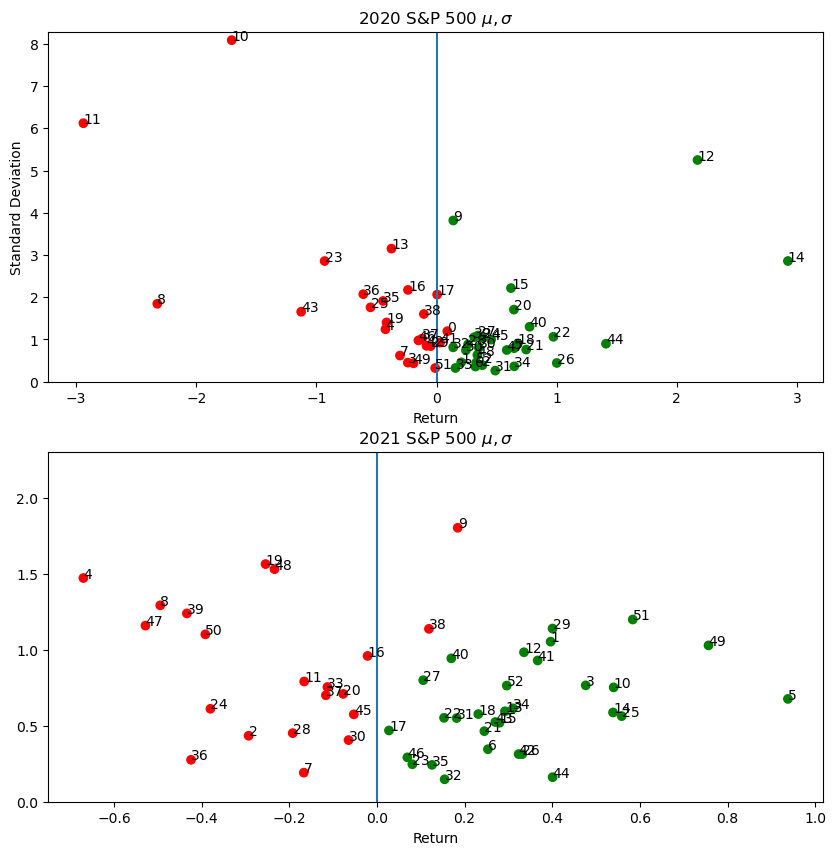

In [13]:

# for i in range(0,53):
#     plt.annotate(spy_wr.iloc[i,1],(spy_wr.iloc[i,2],spy_wr.iloc[i,3]),rotation=0)
# plt.xlabel("Return");plt.ylabel('Standard Deviation');
# plt.title('2020 S&P 500 Weekly Return, Standard Deviation, and Label')
# plt.savefig('./spy_2020_R_SD')
fig = plt.figure(1,figsize=(10,10))
plt.subplot(211)
plt.scatter(data=spy_wr_2020, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,23])
for i in range(0,53):
    plt.annotate(spy_wr.iloc[i,1],(spy_wr.iloc[i,2],spy_wr.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2020 S&P 500 $\mu, \sigma$')
plt.savefig('./spy_2020_R_SD')
plt.ylim(0,max(spy_wr_2020.volatility)+.2)

plt.subplot(212)
plt.scatter(data=spy_wr_2021, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,72])
for i in range(0,52):
    plt.annotate(spy_wr_2021.iloc[i,1],
                 (spy_wr_2021.iloc[i,2],spy_wr_2021.iloc[i,3]),rotation=0)
plt.xlabel("Return");
plt.title('2021 S&P 500 $\mu, \sigma$')
plt.ylim(0,max(spy_wr_2021.volatility)+.5)
plt.savefig('./spy_2020_2021.jpg')

In [14]:
spy2021 = spy45.query('Year==2021')

In [15]:
spy2021.index = range(spy2021.shape[0])

In [16]:
def buy_and_hold(stock):
    return list(100*(stock.tail(1)["Adj Close"].values.astype(float))/\
            stock.head(1)['Open'].values.astype(float))[0]

In [17]:
def trade_from_open_close(stock):
    '''Return a dataframe with weekly return factors based on first day of week
    open and last day of week close'''
    stock_by_week = pd.DataFrame(
        columns=['Year','Week_Number',"Open","Adj Close", 'Return', "Label"])
    y = stock.Year.unique()[0]
    
    for inx, week_num in enumerate(stock["Week_Number"].unique()):
        this_week = stock[stock["Week_Number"]==week_num]
        o = this_week.head(1)['Open'].values[0]
        ac = this_week.tail(1)['Adj Close'].values[0]
        r = 1+(ac-o)/o
        l = this_week.head(1)['Label'].values[0]
        stock_by_week.loc[inx,:] = [y,week_num,o,ac,r,l]
    return stock_by_week

spy_sbw = trade_from_open_close(spy2021)

# Cumulative returns: Buy open, Sell Close, Trade Green.

labels = spy_sbw.Label
returns = spy_sbw.Return
np.round(100*np.cumprod(np.where(labels=='Green',
                             returns.values.astype(float),1)),2)

array([97.56, 97.56, 94.83, 94.83, 94.49, 91.53, 91.53, 91.53, 91.53,
       90.06, 90.06, 88.1 , 86.23, 84.74, 82.93, 82.93, 79.88, 77.47,
       77.47, 77.47, 75.13, 72.4 , 70.05, 70.05, 69.31, 68.03, 66.03,
       66.03, 65.89, 65.89, 64.01, 62.37, 62.37, 60.98, 59.23, 59.23,
       59.23, 59.23, 59.23, 58.09, 57.46, 56.87, 55.76, 55.04, 55.04,
       53.41, 53.41, 53.41, 53.46, 53.46, 53.87, 52.89])

In [18]:
labels = spy_sbw.Label
returns = spy_sbw.Return
np.round(100*np.cumprod(returns.values.astype(float)),2)

array([97.56, 93.17, 90.56, 83.89, 83.59, 80.98, 77.  , 72.67, 69.44,
       68.32, 65.02, 63.61, 62.26, 61.19, 59.88, 57.76, 55.64, 53.96,
       51.26, 49.34, 47.85, 46.11, 44.62, 42.17, 41.72, 40.95, 39.75,
       38.07, 37.99, 36.66, 35.61, 34.69, 33.45, 32.71, 31.77, 30.22,
       28.83, 28.54, 27.15, 26.62, 26.33, 26.07, 25.56, 25.23, 24.34,
       23.62, 22.33, 21.16, 21.17, 20.16, 20.31, 19.94])

If I compare buying at open, selling at adjusted close between the 'buy green, hold red' and buy all weeks, ther is \\$52.89 of principal remaining versus \\$19.94 

In [19]:
buy_and_hold(spy2021)

123.47392821933867

\\$100  becomes $123.47 with the buy-and-hold strategy.

In [20]:
def buy_and_hold_oo(stock):
    return list(100*(stock.tail(1)["Open"].values.astype(float))/\
            stock.head(1)['Open'].values.astype(float))[0]

There is a peculiarity with the spy dataset where the adjusted close values consistently are significantly lower than the open price.  This biases my trading strategy return calculation downwards. For instance, if I had calculated by buying at the adjusted close price and selling at the end of week open price, the returns would have been instead biased upwards.

In [21]:
(round(buy_and_hold(spy2021),2), round(buy_and_hold_oo(spy2021),2))

(123.47, 127.34)

In [22]:
def trade_from_open_open(stock):
    '''Return a dataframe with weekly return factors based on first day of week
    open and last day of week close'''
    stock_by_week = pd.DataFrame(
        columns=['Year','Week_Number',"Open","Adj Close", 'Return', "Label"])
    y = stock.Year.unique()[0]
    
    for inx, week_num in enumerate(stock["Week_Number"].unique()):
        this_week = stock[stock["Week_Number"]==week_num]
        o = this_week.head(1)['Open'].values[0]
        ac = this_week.tail(1)['Open'].values[0]
        r = 1+(ac-o)/o
        l = this_week.head(1)['Label'].values[0]
        stock_by_week.loc[inx,:] = [y,week_num,o,ac,r,l]
    return stock_by_week

spy_sbw = trade_from_open_open(spy2021)

# Cumulative returns: Buy open, Sell Close, Trade Green.

labels = spy_sbw.Label
returns = spy_sbw.Return
#r
spy_oo_strategy, spy_oo_buy_hold = np.round(100*np.cumprod(np.where(labels=='Green',
                             returns.values.astype(float),1)),2), \
                            np.round(100*np.cumprod(returns.values.astype(float)
                                                    ))

In [23]:
spy_oo_strategy, spy_oo_buy_hold

(array([101.41, 101.41, 102.45, 102.45, 106.42, 106.58, 106.58, 106.58,
        106.58, 108.64, 108.64, 108.89, 109.99, 111.34, 113.07, 113.07,
        113.12, 113.25, 113.25, 113.25, 114.23, 113.74, 114.17, 114.17,
        116.66, 117.89, 117.55, 117.55, 120.68, 120.68, 121.16, 122.02,
        122.02, 122.56, 122.83, 122.83, 122.83, 122.83, 122.83, 124.67,
        126.83, 129.45, 129.9 , 132.44, 132.44, 132.71, 132.71, 132.71,
        136.52, 136.52, 140.81, 142.56]),
 array([101., 101., 102., 100., 104., 104., 104., 103., 101., 103., 102.,
        102., 104., 105., 106., 106., 106., 106., 103., 104., 105., 104.,
        105., 103., 105., 106., 106., 106., 109., 108., 109., 110., 109.,
        109., 109., 109., 108., 110., 107., 108., 110., 112., 113., 115.,
        114., 114., 112., 111., 114., 112., 116., 117.]))

Buying at the first day of the week's open price and selling at the last day of the week's open price with the trading strategy turns \\$100 into \\$142.56.

Compare this with the 'trade all weeks' approach and there is a far better return if you can predict a green-labelled week ahead of time.

In [24]:
def buy_hold_weekly(stock):
    tail_ac = []
    o = stock.head(1)['Open']
    for wk in sorted(stock['Week_Number'].unique()):
        ac = stock[stock["Week_Number"] == \
                              wk].tail(1)['Open'].values[0]
        tail_ac.append(ac)
    r = np.array(tail_ac)/o.values[0]
    return r

In [25]:
bhw = np.round(100*buy_hold_weekly(spy2021),2)


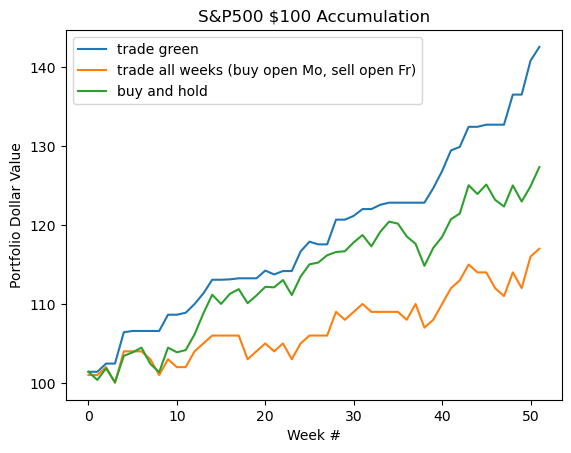

In [26]:

plt.plot(range(len(spy_oo_strategy)),spy_oo_strategy,
        range(len(spy_oo_buy_hold)),spy_oo_buy_hold,
        range(len(bhw)),bhw)
plt.legend(['trade green','trade all weeks (buy open Mo, sell open Fr)',
            'buy and hold'])
plt.xlabel('Week #')
plt.ylabel('Portfolio Dollar Value')
plt.title('S&P500 $100 Accumulation')
plt.savefig('./sp500_100_accumulation.png')